# Predicting HDB prices using various Machine Learning algorithms

# Imports

In [5]:
#In this first section, we will do some EDA to explore the dataset(s).

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
df1 = pd.read_csv(r"C:\Users\Long Bing\Desktop\HDB Project\resale-flat-prices_Datasets\resale-flat-prices-based-on-approval-date-1990-1999.csv")
df2 = pd.read_csv(r"C:\Users\Long Bing\Desktop\HDB Project\resale-flat-prices_Datasets\resale-flat-prices-based-on-approval-date-2000-feb-2012.csv")
df3 = pd.read_csv(r"C:\Users\Long Bing\Desktop\HDB Project\resale-flat-prices_Datasets\resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2014.csv")
df4 = pd.read_csv(r"C:\Users\Long Bing\Desktop\HDB Project\resale-flat-prices_Datasets\resale-flat-prices-based-on-registration-date-from-jan-2015-to-dec-2016.csv")
df5 = pd.read_csv(r"C:\Users\Long Bing\Desktop\HDB Project\resale-flat-prices_Datasets\resale-flat-prices-based-on-registration-date-from-jan-2017-onwards.csv")

In [7]:
#df4 and df5 which are the newer datasets have an additional column "remaining_lease"
df1.info()
df2.info()
df3.info()
df4.info()
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287200 entries, 0 to 287199
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                287200 non-null  object 
 1   town                 287200 non-null  object 
 2   flat_type            287200 non-null  object 
 3   block                287200 non-null  object 
 4   street_name          287200 non-null  object 
 5   storey_range         287200 non-null  object 
 6   floor_area_sqm       287200 non-null  float64
 7   flat_model           287200 non-null  object 
 8   lease_commence_date  287200 non-null  int64  
 9   resale_price         287200 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 21.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369651 entries, 0 to 369650
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 

In [8]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200


In [9]:
df4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [10]:
df5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [11]:
#The "remaining_lease" column is missing in df1, df2 and df3.
#The "remaining_lease" column in df5 is an object consisting of year and month in text
#Convert "remaining_lease" columns to be like the one in df4 (being number of years as int64)

In [12]:
#first Imputing the missing "remaining_lease" column on df1, df2 and df3 calculated by 
#(99 - (year part of "month" - "lease_commence_date"))
df1['year']=df1['month']
df1['year']=df1['year'].astype(str)                                 #convert from ojbect to string
df1['year']=pd.to_datetime(df1['year']).dt.year                     #convert from string to datetime then getting the yearpart
df1['remaining_lease']=99-(df1['year']-df1['lease_commence_date'])  #calculate remaining lease in years

In [13]:
df1.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000,1990,86
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000,1990,86
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000,1990,86
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000,1990,86
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200,1990,85


In [14]:
#do the same for df2 and df3
df2['year']=df2['month']
df2['year'].astype(str)
df2['year']=pd.to_datetime(df2['year']).dt.year
df2['remaining_lease']=99-(df2['year']-df2['lease_commence_date'])
df3['year']=df3['month']
df3['year'].astype(str)
df3['year']=pd.to_datetime(df3['year']).dt.year
df3['remaining_lease']=99-(df3['year']-df3['lease_commence_date'])

In [15]:
df2.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,147000.0,2000,85
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,144000.0,2000,85
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,159000.0,2000,75
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,167000.0,2000,75
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,163000.0,2000,75


In [16]:
df3.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease
0,2012-03,ANG MO KIO,2 ROOM,172,ANG MO KIO AVE 4,06 TO 10,45.0,Improved,1986,250000.0,2012,73
1,2012-03,ANG MO KIO,2 ROOM,510,ANG MO KIO AVE 8,01 TO 05,44.0,Improved,1980,265000.0,2012,67
2,2012-03,ANG MO KIO,3 ROOM,610,ANG MO KIO AVE 4,06 TO 10,68.0,New Generation,1980,315000.0,2012,67
3,2012-03,ANG MO KIO,3 ROOM,474,ANG MO KIO AVE 10,01 TO 05,67.0,New Generation,1984,320000.0,2012,71
4,2012-03,ANG MO KIO,3 ROOM,604,ANG MO KIO AVE 5,06 TO 10,67.0,New Generation,1980,321000.0,2012,67


In [17]:
#Convert "remaining_lease" columns to be like the one in df4 (being number of years as int64)
df5['remaining_lease']=df5['remaining_lease'].str[0:3].astype(int)

#add year column for df4 and df5
df4['year']=df4['month']
df4['year'].astype(str)
df4['year']=pd.to_datetime(df4['year']).dt.year
df5['year']=df5['month']
df5['year'].astype(str)
df5['year']=pd.to_datetime(df5['year']).dt.year

In [18]:
df5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61,232000.0,2017
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60,250000.0,2017
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,262000.0,2017
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62,265000.0,2017
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62,265000.0,2017


In [19]:
#appending all datasets into 1 large dataset to work with
df = df1.append([df2,df3,df4,df5])

In [20]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,86
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,86
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,86
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,86
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,85


In [21]:
#convert from float to int
df['floor_area_sqm']=df['floor_area_sqm'].astype(int)
df['resale_price']=df['resale_price'].astype(int)
df['year']=df['year'].astype(int)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 833826 entries, 0 to 87618
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   month                833826 non-null  object
 1   town                 833826 non-null  object
 2   flat_type            833826 non-null  object
 3   block                833826 non-null  object
 4   street_name          833826 non-null  object
 5   storey_range         833826 non-null  object
 6   floor_area_sqm       833826 non-null  int32 
 7   flat_model           833826 non-null  object
 8   lease_commence_date  833826 non-null  int64 
 9   resale_price         833826 non-null  int32 
 10  year                 833826 non-null  int32 
 11  remaining_lease      833826 non-null  int64 
dtypes: int32(3), int64(2), object(7)
memory usage: 73.2+ MB


In [23]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31,IMPROVED,1977,9000,1990,86
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31,IMPROVED,1977,6000,1990,86
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31,IMPROVED,1977,8000,1990,86
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31,IMPROVED,1977,6000,1990,86
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73,NEW GENERATION,1976,47200,1990,85


In [24]:
#save this df for future Machine Learning applications
df.to_csv(r"C:\Users\Long Bing\Desktop\HDB Project\Resale_Flats_Dataset.csv")

# EDA

In [25]:
average_price = df['resale_price'].groupby(df['month']).mean()

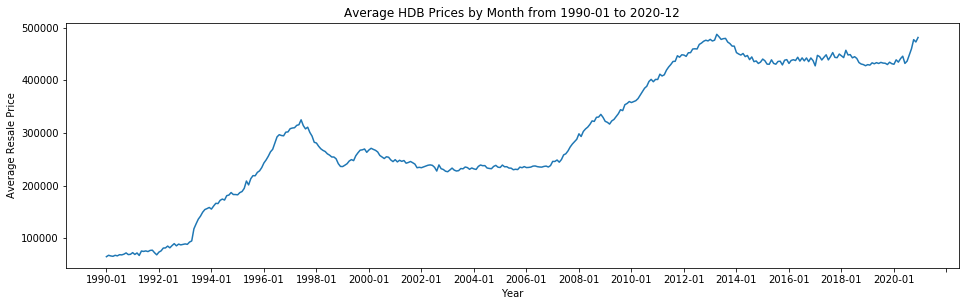

In [26]:
plt.figure(figsize=(16,4.5))
plt.title('Average HDB Prices by Month from 1990-01 to 2020-12')
plt.xlabel('Year')
plt.ylabel('Average Resale Price')
mth_range=np.arange(0,600,24).tolist()
plt.xticks(mth_range)
plt.plot(average_price)

In [261]:
#Use more recent data for EDA and subsequent Machine Learning (2012-01 onwards)
hdb = df[df['month']>='2012-01'].reset_index(drop=True)
hdb.info()
hdb.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180163 entries, 0 to 180162
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   month                180163 non-null  object
 1   town                 180163 non-null  object
 2   flat_type            180163 non-null  object
 3   block                180163 non-null  object
 4   street_name          180163 non-null  object
 5   storey_range         180163 non-null  object
 6   floor_area_sqm       180163 non-null  int32 
 7   flat_model           180163 non-null  object
 8   lease_commence_date  180163 non-null  int64 
 9   resale_price         180163 non-null  int32 
 10  year                 180163 non-null  int32 
 11  remaining_lease      180163 non-null  int64 
dtypes: int32(3), int64(2), object(7)
memory usage: 14.4+ MB


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease
0,2012-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,01 TO 03,44,Improved,1979,257800,2012,66
1,2012-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,07 TO 09,44,Improved,1978,263000,2012,65
2,2012-01,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,10 TO 12,44,Improved,1978,275000,2012,65
3,2012-01,ANG MO KIO,2 ROOM,170,ANG MO KIO AVE 4,01 TO 03,45,Improved,1986,260000,2012,73
4,2012-01,ANG MO KIO,2 ROOM,174,ANG MO KIO AVE 4,07 TO 09,45,Improved,1986,226000,2012,73


In [272]:
#save this df for future Machine Learning applications
hdb.to_csv(r"C:\Users\Long Bing\Desktop\HDB Project\Resale_Flats_Dataset_2012_Onwards.csv",index=False)

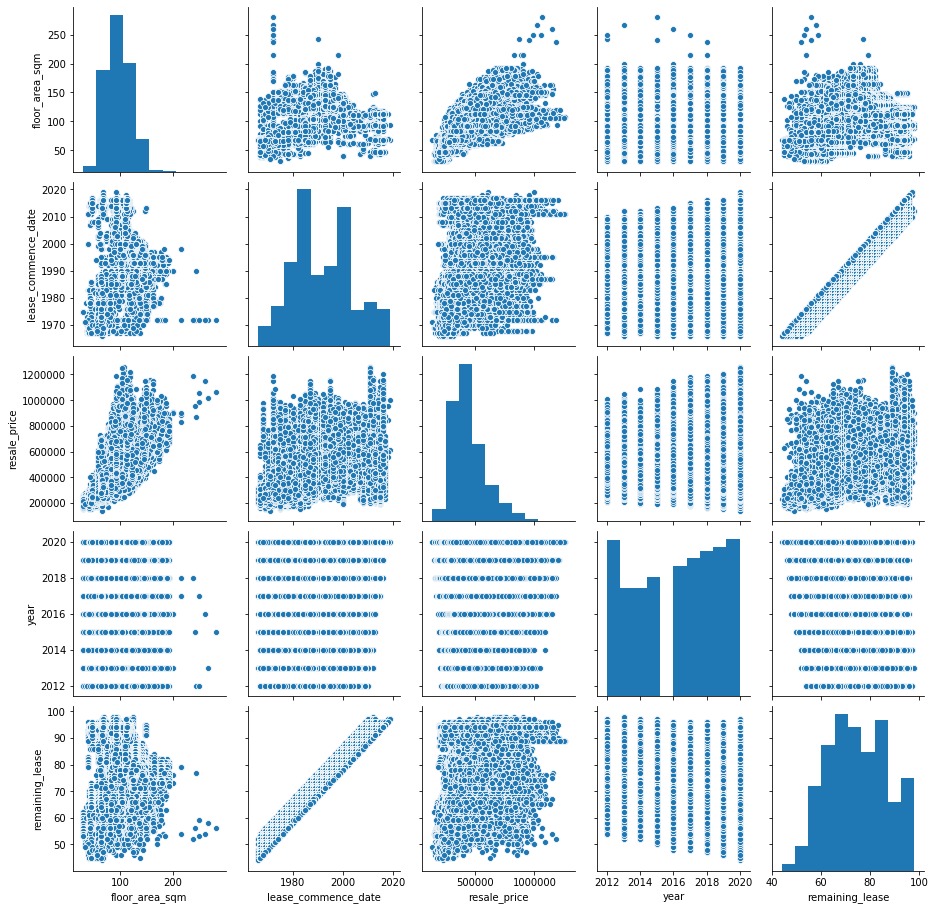

In [263]:
sns.pairplot(hdb)

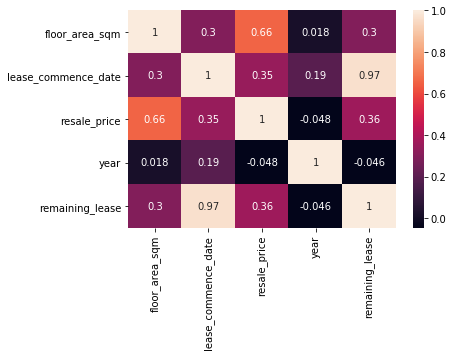

In [264]:
sns.heatmap(hdb.corr(),annot=True)

In [266]:
# From the correlation martix and pairplot, we can see that 'lease_commence_date' and 'remaining_lease' are 
# highly correlated which makes sense. Will need to remove one to prevent collinearity problems

# 'Floor_area_sqm' is also correlated with 'resale_price' 
# other categorical and variables will be explored in machine learning projects

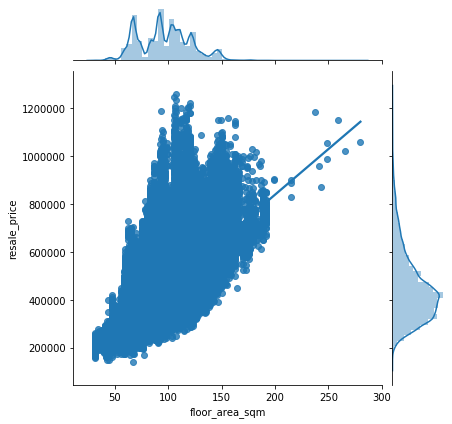

In [270]:
sns.jointplot(x="floor_area_sqm", y="resale_price", data=hdb, kind="reg");

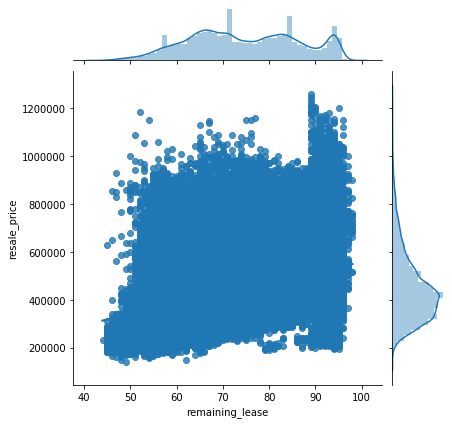

In [271]:
sns.jointplot(x="remaining_lease", y="resale_price", data=hdb, kind="reg");